In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df=pd.read_csv("../cleaned_csvs/Data_2019.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99228 entries, 0 to 99227
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           99228 non-null  int64  
 1   FL_DATE              99228 non-null  object 
 2   OP_UNIQUE_CARRIER    99228 non-null  object 
 3   ORIGIN               99228 non-null  object 
 4   ORIGIN_CITY_NAME     99228 non-null  object 
 5   DEST                 99228 non-null  object 
 6   DEST_CITY_NAME       99228 non-null  object 
 7   CRS_DEP_TIME         99228 non-null  int64  
 8   DEP_DELAY            97186 non-null  float64
 9   DEP_DELAY_NEW        97186 non-null  float64
 10  ARR_TIME             97088 non-null  float64
 11  ARR_DELAY            96918 non-null  float64
 12  ARR_DELAY_NEW        96918 non-null  float64
 13  CANCELLED            99228 non-null  float64
 14  CARRIER_DELAY        17779 non-null  float64
 15  WEATHER_DELAY        17779 non-null 

In [4]:
# Delete Unwated Columns

del data_df['Unnamed: 0']
del data_df['ORIGIN_CITY_NAME']
del data_df['DEST_CITY_NAME']
del data_df['ARR_TIME']
del data_df['DEP_DELAY']
del data_df['ARR_DELAY']
del data_df['ARR_DELAY_NEW']
del data_df['CRS_DEP_TIME']

data_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month
0,2019-01-01,9E,CLE,MSP,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1
1,2019-01-01,9E,CLE,JFK,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1
2,2019-01-01,9E,CLE,DTW,3.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1
3,2019-01-01,9E,DTW,CLE,0.0,0.0,0.0,0.0,19.0,0.0,0.0,2019,1
4,2019-01-01,9E,DTW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99223,2019-12-31,NK,CLE,LAX,43.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,12
99224,2019-12-31,NK,CLE,ATL,4.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,12
99225,2019-12-31,NK,ATL,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,12
99226,2019-12-31,NK,RSW,CLE,16.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,12


In [5]:
# FLights Departing from Cleveland Airport "CLE"

dep_cle_df=data_df.loc[data_df["ORIGIN"] =="CLE"]
dep_cle_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month
0,2019-01-01,9E,CLE,MSP,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1
1,2019-01-01,9E,CLE,JFK,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1
2,2019-01-01,9E,CLE,DTW,3.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1
6,2019-01-01,AA,CLE,PHL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1
7,2019-01-01,MQ,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99218,2019-12-31,NK,CLE,LAS,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,12
99220,2019-12-31,NK,CLE,TPA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,12
99223,2019-12-31,NK,CLE,LAX,43.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,12
99224,2019-12-31,NK,CLE,ATL,4.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,12


In [6]:
dep_cle_df['OP_UNIQUE_CARRIER'].unique()

array(['9E', 'AA', 'MQ', 'OH', 'B6', 'F9', 'NK', 'OO', 'WN', 'EV', 'YV',
       'YX', 'UA', 'DL', 'G4'], dtype=object)

In [7]:
# Add unique carrier name column
# create dict of unique_carrier codes to names
# map to unique_carrier column to transform values to strings
# carrier names were acquired from BTS statistics definitions

unique_carrier_dict = {'F9':'Frontier','DL':'Delta',
                       'NK':'Spirit','EV':'ExpressJet','OO':'SkyWest Airlines',
                       'UA':'United','AA':'American Airlines',
                       'B6':'JetBlue','WN':'Southwest Airlines', 'OH':'US Airways',
                       'YX':'Republic Airways', '9E':'Endeavor Air', 'MQ':'Envoy Air Inc',
                       'YV':'Mesa Airlines', 'G4':'Allegiant Air'}

#map dict to unique_carrier column

dep_cle_df['unique_carrier_nm'] = dep_cle_df['OP_UNIQUE_CARRIER'].map(unique_carrier_dict)

#view final dataframe on flight origin and destination

dep_cle_df.head()

/Users/diegogonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm
0,2019-01-01,9E,CLE,MSP,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1,Endeavor Air
1,2019-01-01,9E,CLE,JFK,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1,Endeavor Air
2,2019-01-01,9E,CLE,DTW,3.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1,Endeavor Air
6,2019-01-01,AA,CLE,PHL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1,American Airlines
7,2019-01-01,MQ,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019,1,Envoy Air Inc


In [8]:
# Clear NaNs

dep_clean_df = dep_cle_df.fillna(0)
dep_clean_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm
0,2019-01-01,9E,CLE,MSP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,Endeavor Air
1,2019-01-01,9E,CLE,JFK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,Endeavor Air
2,2019-01-01,9E,CLE,DTW,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,Endeavor Air
6,2019-01-01,AA,CLE,PHL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,American Airlines
7,2019-01-01,MQ,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,Envoy Air Inc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99218,2019-12-31,NK,CLE,LAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,12,Spirit
99220,2019-12-31,NK,CLE,TPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,12,Spirit
99223,2019-12-31,NK,CLE,LAX,43.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,12,Spirit
99224,2019-12-31,NK,CLE,ATL,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,12,Spirit


In [9]:
fligh_per_carrier_df = dep_clean_df.groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Number of flights per Carrier')
fligh_per_carrier_df

,Airline,Number of flights per Carrier
0,Allegiant Air,660
1,American Airlines,3028
2,Delta,3529
3,Endeavor Air,4174
4,Envoy Air Inc,3421
5,ExpressJet,4874
6,Frontier,3186
7,JetBlue,1472
8,Mesa Airlines,995
9,Republic Airways,2214


<function matplotlib.pyplot.show(*args, **kw)>

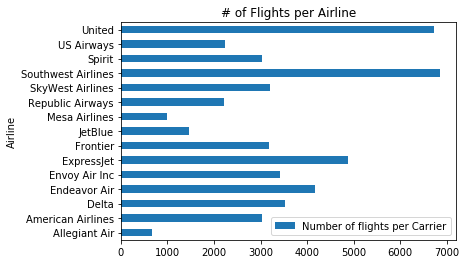

In [10]:
# plot number of flights per carrier

fligh_per_carrier_df.plot.barh(x='Airline', y='Number of flights per Carrier',
                               title="# of Flights per Airline");

plt.savefig('../delays/plots/Number of Flights per Airline - 2019.jpg',bbox_inches='tight', dpi=150)
plt.show

In [11]:
# Create a column with Ontime, Late Cancelled status

dep_clean_df.loc[dep_clean_df.DEP_DELAY_NEW <= 15, "Flight Status"]="OnTime"
dep_clean_df.loc[dep_clean_df.DEP_DELAY_NEW > 15, "Flight Status"]="Late"
dep_clean_df.loc[dep_clean_df.CANCELLED == 1, "Flight Status"]="Cancelled"
dep_clean_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm,Flight Status
0,2019-01-01,9E,CLE,MSP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,Endeavor Air,OnTime
1,2019-01-01,9E,CLE,JFK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,Endeavor Air,OnTime
2,2019-01-01,9E,CLE,DTW,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,Endeavor Air,OnTime
6,2019-01-01,AA,CLE,PHL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,American Airlines,OnTime
7,2019-01-01,MQ,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,Envoy Air Inc,OnTime


In [12]:
# Count Flight Status

flightstatus_df = dep_clean_df.groupby('Flight Status')['Flight Status'].count()
flightstatus_df

Flight Status
Cancelled     1087
Late          7991
OnTime       40537
Name: Flight Status, dtype: int64

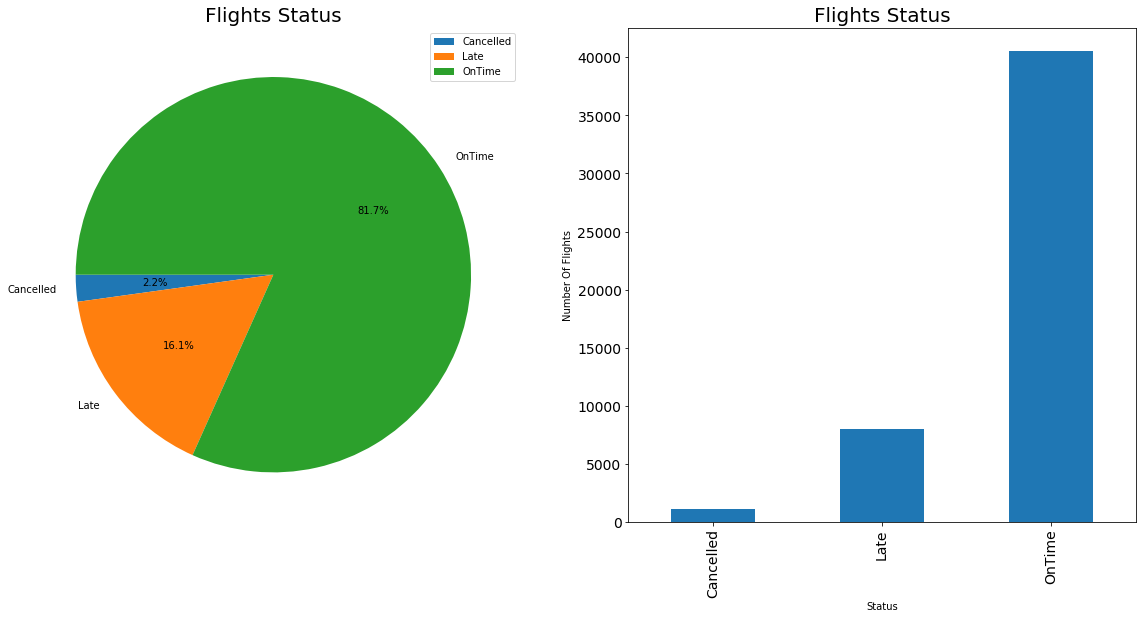

In [13]:
# Plot FLight Status

fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(flightstatus_df, labels=flightstatus_df.index, startangle=180, autopct='%1.1f%%')
ax.set_title("Flights Status", fontsize=20);
plt.gcf().gca()
plt.legend()

ax2 = fig.add_subplot(222)
ax2.set_title("Flights Status", fontsize=20);
ax2.set_facecolor('white')
flightstatus_df.plot(kind='bar', ax=ax2,  legend=False, fontsize=14)
plt.xlabel('Status')
plt.ylabel('Number Of Flights')
plt.savefig('../delays/plots/Flight status - 2019.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [14]:
# Flitering flights by delays > 15 min

delays_df = dep_clean_df.loc[dep_clean_df['DEP_DELAY_NEW'] > 15]
delays_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm,Flight Status
12,2019-01-01,MQ,CLE,ORD,38.0,0.0,0.0,0.0,0.0,0.0,38.0,2019,1,Envoy Air Inc,Late
19,2019-01-01,B6,CLE,BOS,51.0,0.0,2.0,0.0,0.0,0.0,39.0,2019,1,JetBlue,Late
34,2019-01-01,F9,CLE,LAS,48.0,0.0,5.0,0.0,11.0,0.0,43.0,2019,1,Frontier,Late
35,2019-01-01,F9,CLE,RSW,44.0,0.0,0.0,0.0,0.0,0.0,34.0,2019,1,Frontier,Late
46,2019-01-01,OH,CLE,DCA,68.0,0.0,10.0,0.0,0.0,0.0,55.0,2019,1,US Airways,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99098,2019-12-31,9E,CLE,BOS,238.0,0.0,238.0,0.0,1.0,0.0,0.0,2019,12,Endeavor Air,Late
99123,2019-12-31,EV,CLE,ORD,38.0,0.0,26.0,0.0,0.0,0.0,0.0,2019,12,ExpressJet,Late
99187,2019-12-31,UA,CLE,SFO,30.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,12,United,Late
99199,2019-12-31,UA,CLE,ORD,22.0,0.0,0.0,0.0,24.0,0.0,0.0,2019,12,United,Late


In [15]:
# Grouping delayed flights by carrier

groupby_df = delays_df.groupby(['unique_carrier_nm'])['DEP_DELAY_NEW'].count()
groupby_df

unique_carrier_nm
Allegiant Air          145
American Airlines      385
Delta                  335
Endeavor Air           734
Envoy Air Inc          644
ExpressJet            1135
Frontier               680
JetBlue                262
Mesa Airlines          135
Republic Airways       367
SkyWest Airlines       660
Southwest Airlines     805
Spirit                 567
US Airways             356
United                 809
Name: DEP_DELAY_NEW, dtype: int64

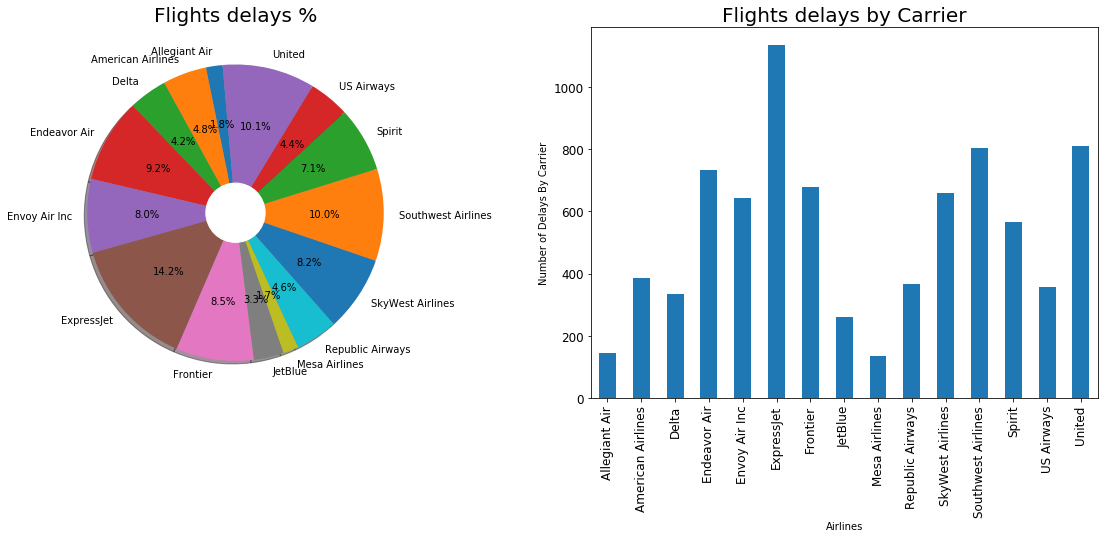

In [16]:
# Plot Delayed flights by carrier

fig = plt.figure(figsize=[20, 15])
ax = fig.add_subplot(221)
ax.pie(groupby_df, labeldistance=1.1, labels=groupby_df.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Flights delays %", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_title("Flights delays by Carrier", fontsize=20);
ax2.set_facecolor('white')
groupby_df.plot(kind='bar', ax=ax2,  legend=False, fontsize=12)
plt.xlabel('Airlines')
plt.ylabel('Number of Delays By Carrier')
plt.savefig('../delays/plots/Flights delays by Carrier - 2019.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [17]:
# Filter Delays by category

# Carrier Delays

delays_df[delays_df['CARRIER_DELAY'] > 15]['CARRIER_DELAY'].count()

1807

In [18]:
carrier_delays_df = delays_df.loc[delays_df['CARRIER_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Carrier Delays')
carrier_delays_df

,Airline,Carrier Delays
0,Allegiant Air,31
1,American Airlines,107
2,Delta,116
3,Endeavor Air,117
4,Envoy Air Inc,136
5,ExpressJet,286
6,Frontier,205
7,JetBlue,83
8,Mesa Airlines,30
9,Republic Airways,63


In [19]:
# Weather Delays

delays_df[delays_df['WEATHER_DELAY'] > 15]['WEATHER_DELAY'].count()

180

In [20]:
weather_delays_df = delays_df.loc[delays_df['WEATHER_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Weather Delays')
weather_delays_df

,Airline,Weather Delays
0,Allegiant Air,6
1,American Airlines,9
2,Delta,12
3,Endeavor Air,13
4,Envoy Air Inc,7
5,ExpressJet,9
6,Frontier,11
7,JetBlue,3
8,Mesa Airlines,13
9,Republic Airways,9


In [21]:
# NAS Delays

delays_df[delays_df['NAS_DELAY'] > 15]['NAS_DELAY'].count()

2084

In [22]:
nas_delays_df = delays_df.loc[delays_df['NAS_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='NAS Delays')
nas_delays_df

,Airline,NAS Delays
0,Allegiant Air,13
1,American Airlines,56
2,Delta,35
3,Endeavor Air,281
4,Envoy Air Inc,187
5,ExpressJet,498
6,Frontier,132
7,JetBlue,76
8,Mesa Airlines,17
9,Republic Airways,175


In [23]:
# Security Delays

delays_df[delays_df['SECURITY_DELAY'] > 15]['SECURITY_DELAY'].count()

13

In [24]:
security_delays_df = delays_df.loc[delays_df['SECURITY_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Security Delays')
security_delays_df

,Airline,Security Delays
0,Endeavor Air,1
1,JetBlue,2
2,Southwest Airlines,7
3,Spirit,2
4,US Airways,1


In [25]:
#Late Aircraft Delays

delays_df[delays_df['LATE_AIRCRAFT_DELAY'] > 15]['LATE_AIRCRAFT_DELAY'].count()

3256

In [26]:
late_aircaft_df = delays_df.loc[delays_df['LATE_AIRCRAFT_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Late Aircraft Delays')
late_aircaft_df

,Airline,Late Aircraft Delays
0,Allegiant Air,96
1,American Airlines,173
2,Delta,98
3,Endeavor Air,300
4,Envoy Air Inc,284
5,ExpressJet,370
6,Frontier,285
7,JetBlue,91
8,Mesa Airlines,59
9,Republic Airways,100


In [27]:
# Merge Delays per Category

merge = pd.merge(carrier_delays_df, weather_delays_df)
merge2 = pd.merge(merge, nas_delays_df)
merge3 =pd.merge(merge2, late_aircaft_df)
merge4 = pd.merge(merge3, security_delays_df, how='outer')
delays_category = merge4.fillna(0)
delays_category

,Airline,Carrier Delays,Weather Delays,NAS Delays,Late Aircraft Delays,Security Delays
0,Allegiant Air,31,6,13,96,0.0
1,American Airlines,107,9,56,173,0.0
2,Delta,116,12,35,98,0.0
3,Endeavor Air,117,13,281,300,1.0
4,Envoy Air Inc,136,7,187,284,0.0
5,ExpressJet,286,9,498,370,0.0
6,Frontier,205,11,132,285,0.0
7,JetBlue,83,3,76,91,2.0
8,Mesa Airlines,30,13,17,59,0.0
9,Republic Airways,63,9,175,100,0.0


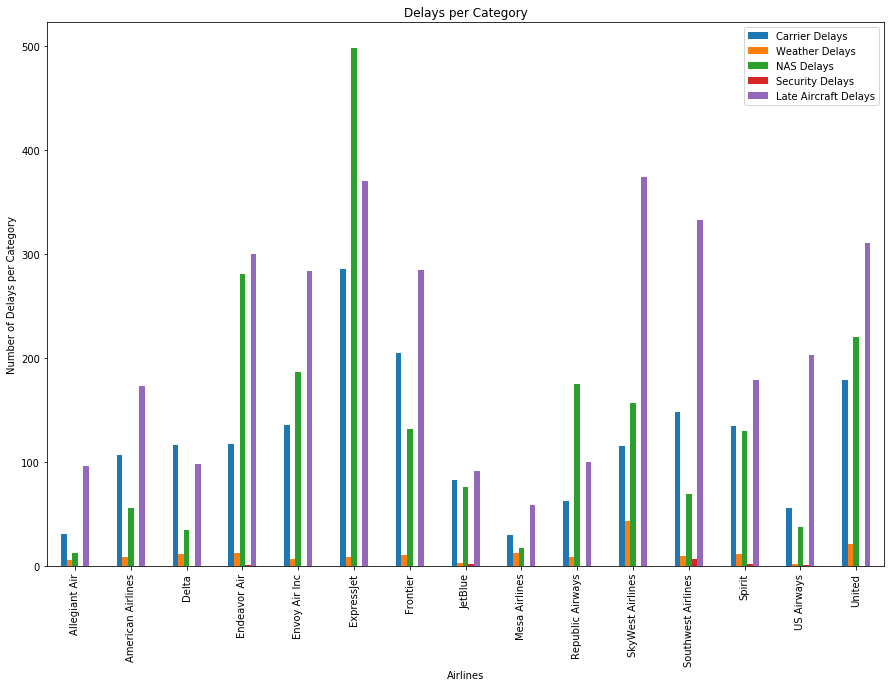

In [45]:
# Plot Delays by category

delays_category.plot(x="Airline", y=["Carrier Delays", "Weather Delays", "NAS Delays", "Security Delays", "Late Aircraft Delays"], kind="bar", figsize=(15,10))
plt.xlabel('Airlines')
plt.ylabel('Number of Delays per Category')
plt.title('Delays per Category')
plt.savefig('../delays/plots/Delays per category - 2019.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [29]:
# Flights By Month

delays_df.loc[:, 'month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  ['01-Jan', '02-Feb', '03-March', '04-Apr', '05-May', '06-Jun',
                                  '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
                                  inplace=True)

monthly_flights_df = dep_clean_df.groupby(['month'])['month'].count()
monthly_flights_df


/Users/diegogonzalez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


month
1     3902
2     3567
3     4298
4     4170
5     4373
6     4370
7     4453
8     4423
9     4154
10    4160
11    3816
12    3929
Name: month, dtype: int64

In [30]:
# Delays by month

delays_df.loc[:, 'month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  ['01-Jan', '02-Feb', '03-March', '04-Apr', '05-May', '06-Jun',
                                  '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
                                  inplace=True)

month_delay = delays_df.groupby(['month'])['DEP_DELAY_NEW'].count()
month_delay

month
01-Jan      713
02-Feb      642
03-March    604
04-Apr      655
05-May      773
06-Jun      884
07-Jul      786
08-Aug      820
09-Sep      478
10-Oct      516
11-Nov      481
12-Dec      667
Name: DEP_DELAY_NEW, dtype: int64

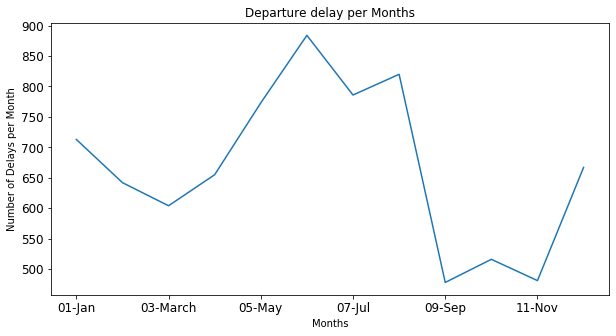

In [31]:
month_delay.plot(figsize=[10,5], title ="Departure delay per Months",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.xlabel('Months')
plt.ylabel('Number of Delays per Month')
plt.savefig('../delays/plots/Number of Delays per Month - 2019.jpg',bbox_inches='tight', dpi=150)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

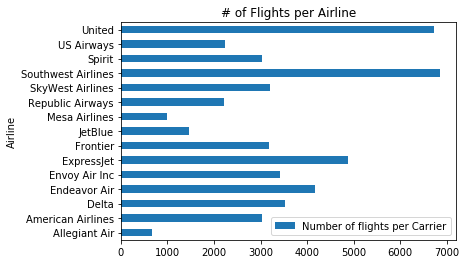

In [32]:
# plot number of flights per carrier

fligh_per_carrier_df.plot.barh(x='Airline', y='Number of flights per Carrier',
                               title="# of Flights per Airline");


plt.savefig('../delays/plots/Number of Flights per Airline - 2019.jpg',bbox_inches='tight', dpi=150)
plt.show